In [3]:
# import sys
# !{sys.executable} -m pip install scikit-learn

  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (38.1 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)


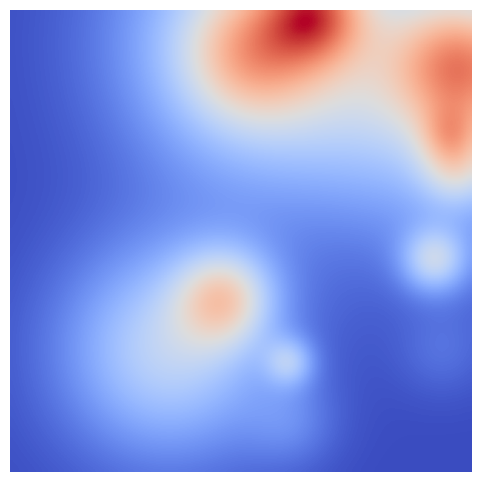

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Function to generate random tie dye pattern
def generate_tie_dye(shape, num_colors=6, blur=3):
    # Create a blank canvas
    canvas = np.zeros(shape)

    # Generate random color centers
    colors = np.random.rand(num_colors, 8)

    # Add random color blobs
    for color in colors:
        x = np.random.randint(0, shape[1])
        y = np.random.randint(0, shape[0])
        radius = np.random.randint(10, 100)
        strength = np.random.rand()
        canvas += strength * np.exp(-((np.arange(shape[1]) - x) ** 2 + (np.arange(shape[0])[:, np.newaxis] - y) ** 2) / radius ** 2)

    # Blur the image
    canvas = gaussian_filter(canvas, sigma=blur)

    # Normalize canvas values
    canvas /= np.max(canvas)

    return canvas

# Create tie dye pattern
canvas = generate_tie_dye((300, 300),13,2)

# Display tie dye pattern
plt.figure(figsize=(8, 6))
plt.imshow(canvas, cmap='coolwarm')
plt.axis('off')
# plt.title('Tie Dye Design')
plt.show()


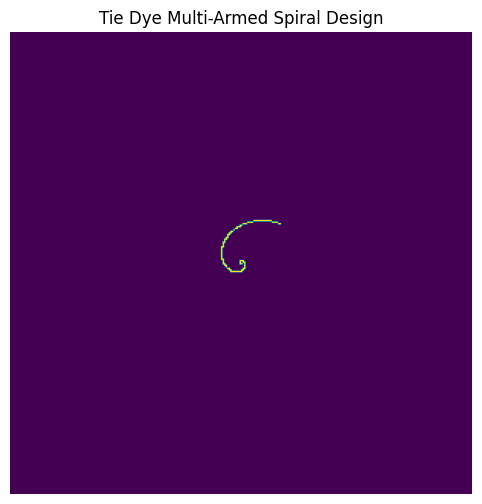

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Function to generate random tie dye pattern
def generate_tie_dye(shape, num_colors=6, blur=2):
    # Create a blank canvas
    canvas = np.zeros(shape)

    # Generate random color centers
    colors = np.random.rand(num_colors, 3)

    # Add random color blobs
    for color in colors:
        x = np.random.randint(0, shape[1])
        y = np.random.randint(0, shape[0])
        radius = np.random.randint(10, 100)
        strength = np.random.rand()
        canvas += strength * np.exp(-((np.arange(shape[1]) - x) ** 2 + (np.arange(shape[0])[:, np.newaxis] - y) ** 2) / radius ** 2)

    # Blur the image
    canvas = gaussian_filter(canvas, sigma=blur)

    # Normalize canvas values
    canvas /= np.max(canvas)

    return canvas

# Function to generate a multi-armed spiral with tie dye effect
def generate_multi_arm_spiral(shape, num_arms=6, num_colors=6, a=0.1, b=0.5):
    # Initialize empty canvas
    canvas = np.zeros(shape)

    # Generate theta values
    thetas = np.linspace(0, 2 * np.pi, shape[1])

    # Generate multiple armed spirals
    for i in range(num_arms):
        # Calculate the radius for each theta
        radius = a * np.exp(b * thetas)

        # Convert polar coordinates to Cartesian coordinates
        x = radius * np.cos(thetas) + shape[1] // 2  # Shift x coordinates to center
        y = radius * np.sin(thetas) + shape[0] // 2  # Shift y coordinates to center

        # Rescale coordinates to fit canvas shape
        x = np.clip(x, 0, shape[1] - 1).astype(int)
        y = np.clip(y, 0, shape[0] - 1).astype(int)

        # Apply tie dye pattern to the arm
        for j in range(len(x)):
            canvas[y[j], x[j]] = generate_tie_dye(shape=(1, 1), num_colors=num_colors)

        # Rotate thetas for the next arm
        thetas += 2 * np.pi / num_arms

    return canvas

# Create multi-armed spiral pattern with tie dye effect
canvas_multi_arm_spiral = generate_multi_arm_spiral(shape=(300, 300), num_arms=8, num_colors=6)

# Display combined pattern
plt.figure(figsize=(8, 6))
plt.imshow(canvas_multi_arm_spiral, cmap='viridis')
plt.axis('off')
plt.title('Tie Dye Multi-Armed Spiral Design')
plt.show()
